In [85]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [86]:
df = pd.read_csv('Bengaluru_House_Data.csv')
pd.pandas.set_option('display.max_columns', None)
df.head()

,Area Type,Availability,location,Bedrooms,society,Total Sqft,Bathrooms,Balcony,Price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [87]:
df = df.drop(columns=['location', 'society'])
df.head()

,Area Type,Availability,Bedrooms,Total Sqft,Bathrooms,Balcony,Price
0,Super built-up Area,19-Dec,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,2 BHK,1200,2.0,1.0,51.00


In [88]:
df['Bedrooms'] = df['Bedrooms'].str.replace(r' BHK| Bedroom| RK', '', regex=True)
df['Total Sqft'] = df['Total Sqft'].str.replace(r'Sq. Meter|Perch|Sq. Yards|Acres|Cents|Guntha|Grounds', '', regex=True)

In [89]:
df['Area Type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [90]:
from datetime import datetime

def func(value):
    try:
        datetime.strptime(value, '%d-%b')
        return 0
    except ValueError:
        return 1
    
df['Availability'] = df['Availability'].apply(func)

In [91]:
def func(value):
    if '-' in value:
        return np.nan
    else:
        return value
    
df['Total Sqft'] = df['Total Sqft'].apply(func)

In [92]:
df.head()

,Area Type,Availability,Bedrooms,Total Sqft,Bathrooms,Balcony,Price
0,Super built-up Area,0,2,1056,2.0,1.0,39.07
1,Plot Area,1,4,2600,5.0,3.0,120.00
2,Built-up Area,1,3,1440,2.0,3.0,62.00
3,Super built-up Area,1,3,1521,3.0,1.0,95.00
4,Super built-up Area,1,2,1200,2.0,1.0,51.00


In [93]:
df.isnull().sum()

Area Type         0
Availability      0
Bedrooms         16
Total Sqft      201
Bathrooms        73
Balcony         609
Price             0
dtype: int64

In [94]:
df.dtypes

Area Type        object
Availability      int64
Bedrooms         object
Total Sqft       object
Bathrooms       float64
Balcony         float64
Price           float64
dtype: object

In [95]:
df['Bedrooms'] = pd.to_numeric(df['Bedrooms'], errors='coerce')
df['Total Sqft'] = df['Total Sqft'].astype('float64')

In [96]:
df.dtypes

Area Type        object
Availability      int64
Bedrooms        float64
Total Sqft      float64
Bathrooms       float64
Balcony         float64
Price           float64
dtype: object

In [97]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
df[df.columns[2:6]] = imputer.fit_transform(df[df.columns[2:6]])

In [98]:
df.isnull().sum()

Area Type       0
Availability    0
Bedrooms        0
Total Sqft      0
Bathrooms       0
Balcony         0
Price           0
dtype: int64

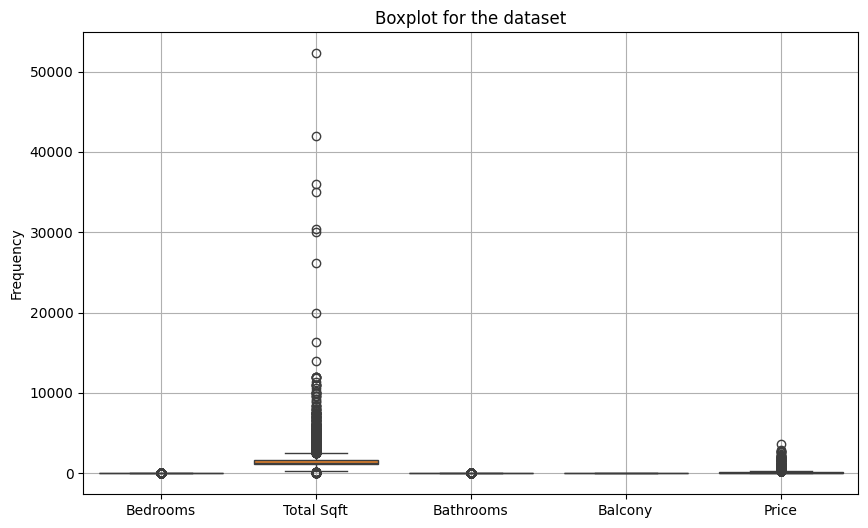

In [99]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[df.columns[2:7]])
plt.title("Boxplot for the dataset")
plt.ylabel("Frequency")
plt.xticks(range(5), df[df.columns[2:7]])
plt.grid(True)
plt.show()

In [100]:
numerical_columns = df.columns[2:7]

n_cols = 1
n_rows = len(numerical_columns) // n_cols

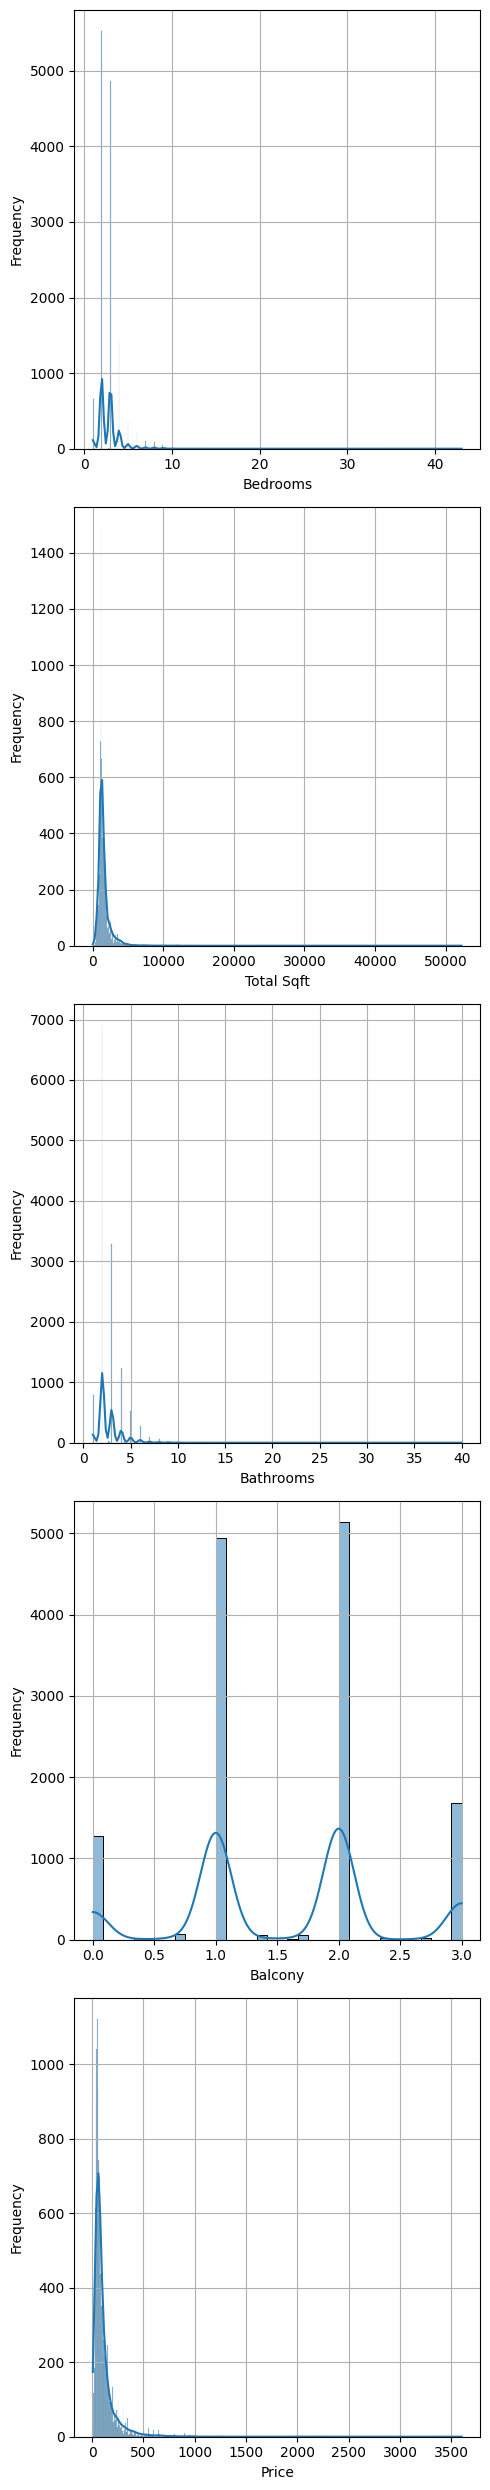

In [101]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))
axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    sns.histplot(data=df[column], ax=axes[i], kde=True)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

In [102]:
df[numerical_columns].skew()

Bedrooms       4.817367
Total Sqft    15.380256
Bathrooms      4.208306
Balcony       -0.003606
Price          8.064469
dtype: float64

In [103]:
df = pd.get_dummies(df, ['Area Type'])
df.head()

,Availability,Bedrooms,Total Sqft,Bathrooms,Balcony,Price,Area Type_Built-up Area,Area Type_Carpet Area,Area Type_Plot Area,Area Type_Super built-up Area
0,0,2.0,1056.0,2.0,1.0,39.07,False,False,False,True
1,1,4.0,2600.0,5.0,3.0,120.00,False,False,True,False
2,1,3.0,1440.0,2.0,3.0,62.00,True,False,False,False
3,1,3.0,1521.0,3.0,1.0,95.00,False,False,False,True
4,1,2.0,1200.0,2.0,1.0,51.00,False,False,False,True


In [104]:
df['Price'] = df.pop('Price')
df.head()

,Availability,Bedrooms,Total Sqft,Bathrooms,Balcony,Area Type_Built-up Area,Area Type_Carpet Area,Area Type_Plot Area,Area Type_Super built-up Area,Price
0,0,2.0,1056.0,2.0,1.0,False,False,False,True,39.07
1,1,4.0,2600.0,5.0,3.0,False,False,True,False,120.00
2,1,3.0,1440.0,2.0,3.0,True,False,False,False,62.00
3,1,3.0,1521.0,3.0,1.0,False,False,False,True,95.00
4,1,2.0,1200.0,2.0,1.0,False,False,False,True,51.00


In [105]:
df.shape

(13320, 10)

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

X = df.iloc[:, :9]
Y = df.iloc[:, 9]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=101)

rfr = RandomForestRegressor(random_state=101)
rfr.fit(X_train, Y_train)

Y_pred_train = rfr.predict(X_train)
Y_pred_test = rfr.predict(X_test)

print('Trained Data :-')
print('Accuracy : ', r2_score(Y_train, Y_pred_train))
print('Mean Absolute Error (MAE) : ', mean_absolute_error(Y_train, Y_pred_train))
print('Mean Squared Error (MSE) : ', mean_squared_error(Y_train, Y_pred_train))
print('Root Mean Squared Error (RMSE) : ', mean_squared_error(Y_train, Y_pred_train, squared=False))

print('\nTest Data :-')
print('Accuracy : ', r2_score(Y_test, Y_pred_test))
print('Mean Absolute Error (MAE) : ', mean_absolute_error(Y_test, Y_pred_test))
print('Mean Squared Error (MSE) : ', mean_squared_error(Y_test, Y_pred_test))
print('Root Mean Squared Error (RMSE) : ', mean_squared_error(Y_test, Y_pred_test, squared=False))

Trained Data :-
Accuracy :  0.9130560095605058
Mean Absolute Error (MAE) :  18.413205909575108
Mean Squared Error (MSE) :  2036.825564550537
Root Mean Squared Error (RMSE) :  45.13120388988684

Test Data :-
Accuracy :  0.5242789204581655
Mean Absolute Error (MAE) :  36.983000800056075
Mean Squared Error (MSE) :  9363.059974954062
Root Mean Squared Error (RMSE) :  96.76290598650942


In [107]:
import pickle

with open('test.pkl', 'wb') as file:
    pickle.dump(rfr, file)

with open('test.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

predictions = loaded_model.predict(X_test)
print("Testing Accuracy: ", loaded_model.score(X_test, Y_test))

Testing Accuracy:  0.5242789204581655


In [111]:
# import pickle
# import numpy as np

# # Load the model
# model = pickle.load(open("D:\\Predictor_Applications v1.2\\HousePrice_Predictor v1.3\\test.pkl", "rb"))

# def main():
#     area_type = 'Plot Area'
    
#     # One-hot encoding for 'Area Type'
#     encoding = {
#         'Super built-up Area': [0, 0, 0, 1],
#         'Plot Area': [0, 0, 1, 0],
#         'Built-up Area': [0, 1, 0, 0],
#         'Carpet Area': [1, 0, 0, 0]
#     }
    
#     # Extract the one-hot encoded vector for the given area_type
#     area_type_encoded = encoding.get(area_type, [0, 0, 0, 0])
    
#     # Prepare the feature vector
#     # Ensure the order of features matches the model's expectation
#     feature_vector = [1, 4, 2600, 5, 3] + area_type_encoded 
    
#     # Predict
#     prediction = model.predict([feature_vector])
#     output = round(prediction[0], 2)
    
#     print(f"Your house price is Rs. {output} Lakhs")

# if __name__ == "__main__":
#     main()


Your house price is Rs. 225.92 Lakhs


c:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
